### Objective
##### 1. Explore movies rating data ( MovieLens data)
##### 2. User-Item Recommendation system
##### 3. User-User; Item- Item Recommendation System.

### Data Sources
GroupLens Research has collected and made available rating data sets from the MovieLens web site (http://movielens.org). The data sets were collected over various periods of time, depending on the size of the set. Before using these data sets, please review their README files for the usage licenses and other details.

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

The data are contained in the files movies.dat, ratings.dat and users.dat.


###### RATINGS DATA ("ratings.dat")

All ratings are in the following format: UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

###### USERS DATA ("users.dat")
================================================================================

User information is in the following format: UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.  Only users who have provided some demographic information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"
    
###### MOVIES DATA("movies.dat")

Movie information is in the following format:MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

## Index
### A. Import library, data and data exploration
### B. Exploratory Data Analysis
### C. User-Item Recommendation system
### D. User-User Recommendation system & Item-Item Recommendation system

### A. Import library, data and data exploration

In [1]:
#import library
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.expand_frame_repr', False) #show all columns in dataset
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [3]:
#Import data from csv file
rating= pd.read_csv('ratings.dat',sep="::",engine='python',header=None)
movies = pd.read_csv('movies.dat',sep="::",engine='python',header=None)
user= pd.read_csv('users.dat',sep="::",engine='python',header=None)

In [4]:
rating.head()

0     1  2          3
0  1  1193  5  978300760
1  1   661  3  978302109
2  1   914  3  978301968
3  1  3408  4  978300275
4  1  2355  5  978824291

In [5]:
#Because the data don't have the column names so in this step give column names for 3 dataframes
rating.columns = ['UserID','MovieID','Rating','Timestamp']
movies.columns= ['MovieID','Title','Genres']
user.columns=['UserID','Gender','Age','Occupation','Zipcode']

In [6]:
rating.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [7]:
movies.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [8]:
user.head()

UserID Gender  Age  Occupation Zipcode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455

In [9]:
#Check data infomation
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [10]:
#check number of Null value
rating.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [11]:
#Check data infomation
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [12]:
#check number of Null value
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [13]:
#Check data infomation
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zipcode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [14]:
#check number of Null value
user.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zipcode       0
dtype: int64

In [15]:
#For easy to explore the user data, we are going to map some data in this dataset.
user['Gender']=user['Gender'].map({'F':"Female",
                                   'M':"Male"})
user['Age']=user['Age'].map({1:  "Under 18", 
                             18:  "18-24",
                             25:  "25-34",
                             35:  "35-44",
                             45:  "45-49",
                             50:  "50-55",
                             56:  "56+"})
user['Occupation']=user['Occupation'].map({0:  "other",
                                           1:  "academic/educator",
                                           2:  "artist",
                                           3:  "clerical/admin",
                                           4:  "college/grad student",
                                           5:  "customer service",
                                           6:  "doctor/health care",
                                           7:  "executive/managerial",
                                           8:  "farmer",
                                           9:  "homemaker",
                                           10:  "K-12 student",
                                           11:  "lawyer",
                                           12:  "programmer",
                                           13:  "retired",
                                           14:  "sales/marketing",
                                           15:  "scientist",
                                           16:  "self-employed",
                                           17:  "technician/engineer",
                                           18:  "tradesman/craftsman",
                                           19:  "unemployed",
                                           20:  "writer"})



### B.  Exploratory Data Analysis

In [16]:
# Get summary statistics of rating
rating['Rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

##### Comment:
- Average rating is 3.58
- Minimum rating is 1 and maximum rating is 5

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


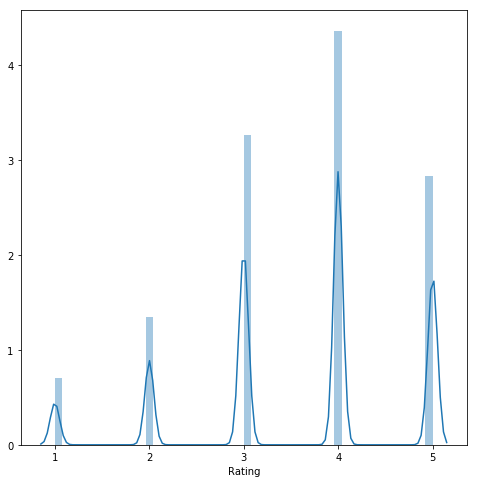

In [17]:
# Display distribution of rating
plt.subplots(figsize=(8,8))
sns.distplot(rating['Rating'])

##### Comment:
- Most frequent rating is 4, 3 and 5
- There is no ratings with decimal number.

In [18]:
#merge 3 dataset into 1
data = pd.merge(movies, pd.merge(rating,user))
data.head()

MovieID             Title                       Genres  UserID  Rating  Timestamp  Gender       Age           Occupation Zipcode
0        1  Toy Story (1995)  Animation|Children's|Comedy       1       5  978824268  Female  Under 18         K-12 student   48067
1        1  Toy Story (1995)  Animation|Children's|Comedy       6       4  978237008  Female     50-55            homemaker   55117
2        1  Toy Story (1995)  Animation|Children's|Comedy       8       4  978233496    Male     25-34           programmer   11413
3        1  Toy Story (1995)  Animation|Children's|Comedy       9       5  978225952    Male     25-34  technician/engineer   61614
4        1  Toy Story (1995)  Animation|Children's|Comedy      10       5  978226474  Female     35-44    academic/educator   95370

In [19]:
rating_mean=data[['Title','Rating']].groupby('Title').mean()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


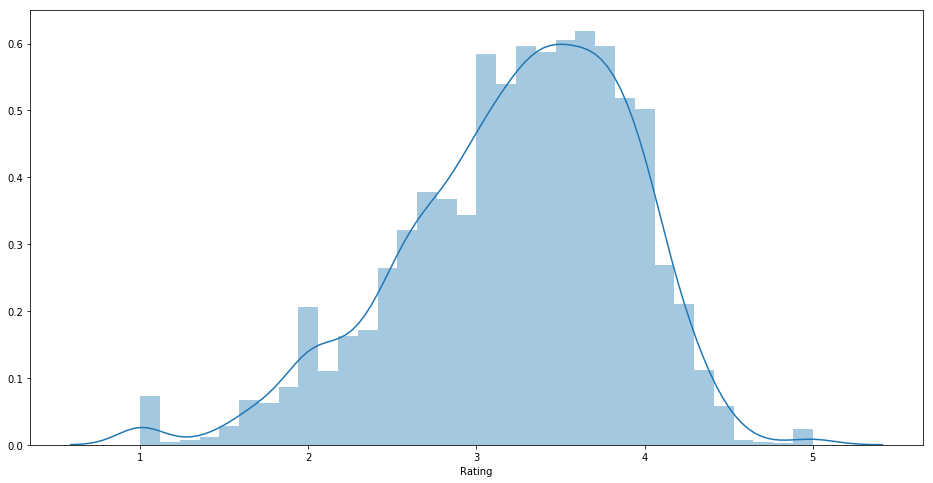

In [20]:
# Display distribution of rating
plt.subplots(figsize=(16,8))
sns.distplot(rating_mean['Rating'])

##### Comment:
- Most average frequent rating is around 3 and 4.
- rating for 1 and 5 are less frequent
- The distribution is a little different with the rating only.

In [21]:
print("Top 20 movies with highest average rating") 
print(rating_mean.sort_values(['Rating'],ascending=False).head(20))

Top 20 movies with highest average rating
                                                      Rating
Title                                                       
Ulysses (Ulisse) (1954)                             5.000000
Lured (1947)                                        5.000000
Follow the Bitch (1998)                             5.000000
Bittersweet Motel (2000)                            5.000000
Song of Freedom (1936)                              5.000000
One Little Indian (1973)                            5.000000
Smashing Time (1967)                                5.000000
Schlafes Bruder (Brother of Sleep) (1995)           5.000000
Gate of Heavenly Peace, The (1995)                  5.000000
Baby, The (1973)                                    5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                 4.800000
Lamerica (1994)                                     4.750000
Apple, The (Sib) (1998)                             4.666667
Sanjuro (1962)                             

In [22]:
print("Top 20 movies with lowest average rating") 
print(rating_mean.sort_values(['Rating'],ascending=False).tail(20))

Top 20 movies with lowest average rating
                                                    Rating
Title                                                     
Lotto Land (1995)                                      1.0
Nueba Yol (1995)                                       1.0
Even Dwarfs Started Small (Auch Zwerge haben kl...     1.0
Get Over It (1996)                                     1.0
Venice/Venice (1992)                                   1.0
Sleepover (1995)                                       1.0
Silence of the Palace, The (Saimt el Qusur) (1994)     1.0
Waltzes from Vienna (1933)                             1.0
Wirey Spindell (1999)                                  1.0
Kestrel's Eye (Falkens öga) (1998)                     1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)            1.0
Loves of Carmen, The (1948)                            1.0
Underworld (1997)                                      1.0
Low Life, The (1994)                                   1.0
Santa with Musc

Text(0,0.5,'Movies Title')

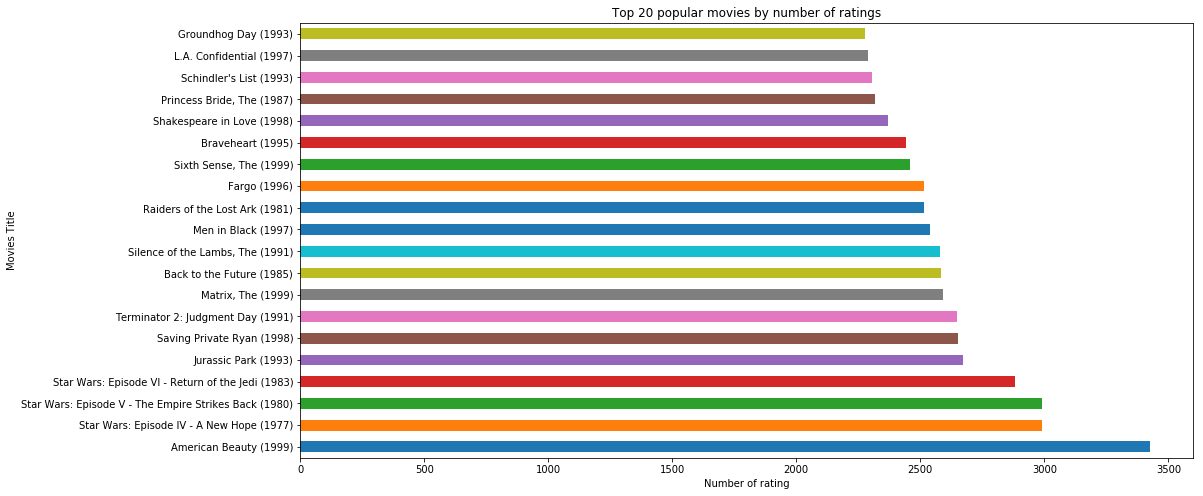

In [23]:
rating_total = data.groupby('Title').size()
plt.subplots(figsize=(16,8))
rating_total.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Top 20 popular movies by number of ratings')
plt.xlabel('Number of rating')
plt.ylabel('Movies Title')

In [24]:
# Get summary statistics of rating
user.head()

UserID  Gender       Age            Occupation Zipcode
0       1  Female  Under 18          K-12 student   48067
1       2    Male       56+         self-employed   70072
2       3    Male     25-34             scientist   55117
3       4    Male     45-49  executive/managerial   02460
4       5    Male     25-34                writer   55455

Text(0.5,1,'User Gender')

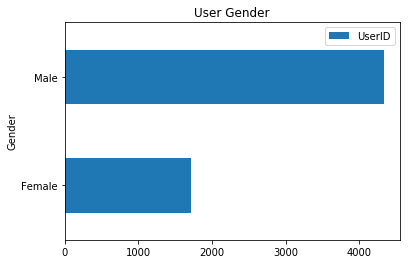

In [25]:
user.pivot_table(["UserID"],index=["Gender"], aggfunc="count").plot(kind='barh')
plt.title('User Gender')

##### Comment:
- Number of male user is more than double number of female user

Text(0.5,1,'User Age')

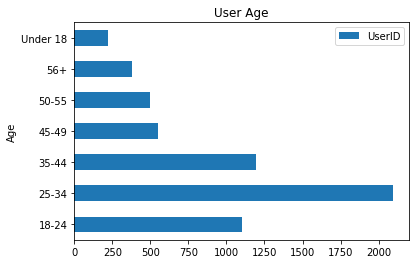

In [26]:
user.pivot_table(["UserID"],index=["Age"], aggfunc="count").plot(kind="barh")
plt.title('User Age')

##### Comment:
- Most frequent group of age is 25-34 and next is 35-44. 
- Under 18 is the smallest number of users.

Text(0.5,1,'User Occupation')

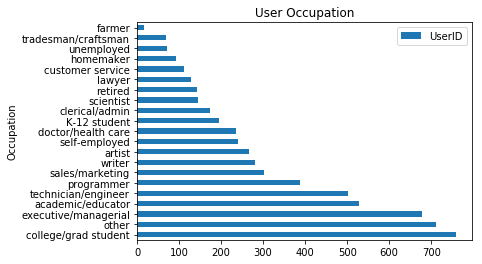

In [27]:
user.pivot_table(["UserID"],index=["Occupation"], aggfunc="count").sort_values(by="UserID", ascending=False).plot(kind="barh")
plt.title('User Occupation')

##### Comment:
- About the occupation, students are the most popular users.
- in the opposite, farmers are less view and rate.

In [28]:
user_rating_count=data[['UserID','Rating']].groupby('UserID').count().sort_values(by="Rating", ascending=False)
print("Top 10 most rated users")
print(pd.merge(user_rating_count,user,on="UserID").head(10))

Top 10 most rated users
   UserID  Rating  Gender    Age            Occupation Zipcode
0    4169    2314    Male  50-55                 other   66048
1    1680    1850    Male  25-34                writer   95380
2    4277    1743    Male  35-44         self-employed   98133
3    1941    1595    Male  35-44   technician/engineer   94550
4    1181    1521    Male  35-44  executive/managerial   20716
5     889    1518    Male  45-49                writer   10024
6    3618    1344    Male    56+   technician/engineer   22657
7    2063    1323    Male  25-34  college/grad student   43138
8    1150    1302  Female  25-34                writer   75226
9    1015    1286    Male  35-44        clerical/admin   11220


##### Comment:
- User 4169 has rated 2314 times and much higher than the second user. 

### C. User-Item Recommendation system

In [29]:
# Due to the limitation of my computer, I only can handle about 10% of the total data. 
# Randomly sample 10% of the ratings dataset
small_rating = rating.sample(frac=0.1)
# Check the sample info
print(small_rating.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100021 entries, 105758 to 240171
Data columns (total 4 columns):
UserID       100021 non-null int64
MovieID      100021 non-null int64
Rating       100021 non-null int64
Timestamp    100021 non-null int64
dtypes: int64(4)
memory usage: 3.8 MB
None


In [30]:
#create a user-item matrix
rating_matrix = small_rating.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)

In [31]:
#Define collaborative filtering function

class CollaborativeFiltering():

    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.

        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """

        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T)


In [32]:
#training the sample data using Collaborative filtering
R = np.array(rating_matrix.values)
cf = CollaborativeFiltering(R, K=20, alpha=0.001, beta=0.01, iterations=100)
cf.train()
print("P x Q:")
print(cf.full_matrix())
print(cf.get_rating(1, 1))

Iteration: 10 ; error = 312.7939
Iteration: 20 ; error = 299.5406
Iteration: 30 ; error = 292.5959
Iteration: 40 ; error = 288.1627
Iteration: 50 ; error = 284.9777
Iteration: 60 ; error = 282.4937
Iteration: 70 ; error = 280.4258
Iteration: 80 ; error = 278.6039
Iteration: 90 ; error = 276.9132
Iteration: 100 ; error = 275.2670
P x Q:
[[4.38204216 3.52904517 3.52072253 ... 3.79227679 3.92021261 4.08564842]
 [3.87334656 3.03708074 3.00594887 ... 3.35667527 3.45366647 3.63582489]
 [4.40555828 3.52161372 3.53520314 ... 3.79790366 3.90667946 4.12573947]
 ...
 [4.06713701 3.20710655 3.21954432 ... 3.4811827  3.60234029 3.77390456]
 [3.93041876 3.08564554 3.06053983 ... 3.35736748 3.48366224 3.66377447]
 [3.78680781 2.91627846 2.91196339 ... 3.17436437 3.29556371 3.51404826]]
3.0370807411197305


In [33]:
#input User ID and Movies ID want to check
rating_user = data.groupby('UserID').size()
user = int(input('Enter User ID: '))
movie = int(input('Enter Movie ID: '))
print("+ User", user ,"has already rated",rating_user[user],"movies")
print("+ Prediction rating for User", user ,"for", movies.loc[(movies.MovieID==movie),"Title"].values[0] ,":","%8.3f"%cf.get_rating(user-1, movie-1))
top_5_idx_UI = np.argsort(cf.full_matrix()[user-1,:])[-5:][::-1]
print ('+ The 5 highest predicted rating movies for User', user )
j=1
for i in top_5_idx_UI:
    print (j,"-",movies.loc[(movies.MovieID==(i-1)),"Title"].values[0], "with rating", "%8.3f"% cf.full_matrix()[user-1,:][i])
    j+=1

Enter User ID: 1
Enter Movie ID: 31
+ User 1 has already rated 53 movies
+ Prediction rating for User 1 for Dangerous Minds (1995) :    3.552
+ The 5 highest predicted rating movies for User 1
1 - Spy Hard (1996) with rating    4.866
2 - Assignment, The (1997) with rating    4.839
3 - Substitute, The (1996) with rating    4.808
4 - Murder in the First (1995) with rating    4.799
5 - Fargo (1996) with rating    4.776


In [34]:
print("User-Item Collaborative Filtering MSE =", "%8.3f"% cf.mse())

User-Item Collaborative Filtering MSE =  275.267


#### Comment:
- With given user Id and Movie Id, the model will give the predicted rating for particular movies from that user. 
- Moreover, the model can help to predict top highest predicted rating movies for that user. 
- The MSE is quite high due to high number of cases in data.

### D. User-User Recommendation system & Item-Item Recommendation system

In [35]:
#Split data into train and test data with proportion of 80-20
rating_train, rating_test = train_test_split(small_rating, test_size=0.2)
rating_train_matrix = rating_train.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
rating_test_matrix = rating_test.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)

In [36]:
# create a similarity matrix between users and items with Pearson Correlation
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(rating_train_matrix, metric='correlation')
item_similarity = pairwise_distances(rating_train_matrix.T, metric='correlation')

In [37]:
# Define a function to predict users or items
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = np.mean(ratings,axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [38]:
user_prediction = predict(rating_train_matrix.values, user_similarity, type='user')
item_prediction = predict(rating_train_matrix.values, item_similarity, type='item')

In [39]:
user_prediction

array([[ 0.11157375,  0.0226652 ,  0.01644724, ..., -0.00416511,
        -0.00331253,  0.01372673],
       [ 0.11395555,  0.0250601 ,  0.01854332, ..., -0.00203753,
        -0.00118647,  0.01568138],
       [ 0.10856752,  0.02051101,  0.01401958, ..., -0.00669212,
        -0.00590084,  0.01131668],
       ...,
       [ 0.10605356,  0.01701813,  0.01044627, ..., -0.01004108,
        -0.00919355,  0.00764157],
       [ 0.11760924,  0.02866108,  0.02205333, ...,  0.00161164,
         0.00250576,  0.01940738],
       [ 0.12782229,  0.03895235,  0.03242044, ...,  0.01176081,
         0.01264327,  0.02956837]])

In [40]:
# listing top 10 similar users of input user
user = int(input('Enter User ID: '))
top_10_idx_U = np.argsort(user_prediction[:,user-1])[-10:][::-1]
print ('+ Top 10 similar user to User', user )
j=1
for i in top_10_idx_U:
    print (j,"-","User", i)
    j+=1

Enter User ID: 1
+ Top 10 similar user to User 1
1 - User 4070
2 - User 4177
3 - User 1636
4 - User 992
5 - User 412
6 - User 1257
7 - User 1892
8 - User 1156
9 - User 4243
10 - User 3451


In [41]:
item_prediction

array([[0.0082552 , 0.00813765, 0.00832558, ..., 0.00833865, 0.00832178,
        0.00833785],
       [0.01038648, 0.01048143, 0.01047982, ..., 0.01049449, 0.01047266,
        0.01047661],
       [0.00571999, 0.00578761, 0.00589209, ..., 0.00571832, 0.00576765,
        0.00590326],
       ...,
       [0.002475  , 0.00242797, 0.00244755, ..., 0.00246833, 0.00246309,
        0.00241802],
       [0.01407552, 0.01408313, 0.01405206, ..., 0.0140767 , 0.01416438,
        0.0141229 ],
       [0.02420472, 0.02425652, 0.024362  , ..., 0.02423698, 0.02429862,
        0.02426428]])

In [42]:
# listing top 10 similar movies of input user
movie = int(input('Enter Movie ID: '))
top_10_idx_I = np.argsort(item_prediction[movie-1,:])[-10:][::-1]
top_10_values_I = [item_prediction[movie-1,:][i] for i in top_10_idx_I]

print ('+ Top 10 recommended movies to', movies.loc[(movies.MovieID==movie),"Title"].values[0])
j=1
for i in top_10_idx_I:
    print (j,"-",movies.loc[(movies.index==(i-1)),"Title"].values[0])
    j+=1

Enter Movie ID: 21
+ Top 10 recommended movies to Get Shorty (1995)
1 - Larger Than Life (1996)
2 - Oscar and Lucinda (a.k.a. Oscar & Lucinda) (1997)
3 - Black Sunday (La Maschera Del Demonio) (1960)
4 - Alien (1979)
5 - She's the One (1996)
6 - Prince Valiant (1997)
7 - Fausto (1993)
8 - Rocky Horror Picture Show, The (1975)
9 - Sparrows (1926)
10 - Boys, Les (1997)


In [43]:
# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [44]:
# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, rating_train_matrix.values)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, rating_train_matrix.values)))

User-based CF RMSE: 3.690348115555851
Item-based CF RMSE: 3.7180964681291733


In [45]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, rating_test_matrix.values)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, rating_test_matrix.values)))

User-based CF RMSE: 3.7459843947909763
Item-based CF RMSE: 3.7467936508092223
